In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Serie de Fourier Compleja
$$
f[x] = \sum_{k=0}^\infty \gamma_k e^{i \omega k x}
$$

$\omega = \frac{2\pi}{T}$
donde $T$ es el periodo de la onda

In [2]:
# definimos la funcion creando un domain
dx = 0.001
L = np.pi # limite superior e inferior [-pi, pi]
x = L * np.arange(-1, 1+dx, dx)
print("x:",x)

N = len(x) #en este ejemplo en particular definimos x asi
print("using N:",N)

# el periodo seria
T = x[-1] - x[0]
print("T:", T, "= 2 pi")

x: [-3.14159265 -3.13845106 -3.13530947 ...  3.13530947  3.13845106
  3.14159265]
using N: 2001
T: 6.283185307179592 = 2 pi


N/4: 500


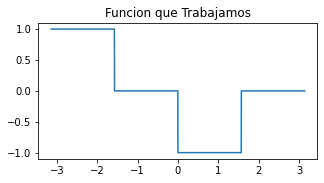

In [3]:
# definir la funcion / Ingresar datos
Nquart = int(np.floor(N/4))
print("N/4:", Nquart)

f = np.zeros_like(x) #crea un arreglo identico a x pero con zeros
f[:Nquart] = 1
f[Nquart:2*Nquart] = 0
f[2*Nquart:3*Nquart] = -1
f[3*Nquart:] = 0


# ------------
fig, ax = plt.subplots(figsize=(5,2.5))
plt.title('Funcion que Trabajamos')
plt.plot(x,f)
plt.show()

## calcular la serie de Fourier

$$
\gamma_k =\frac{1}{T} \int_{t_0}^{t_0+T} f[x) \exp[-i \omega k x) dx
$$

donde $\omega = \frac{2\pi}{T}$

### la integral es discretizable a:
Vease el notebook adjunto `regla_trapezoidal.ipynb`

$h= \frac{T}{N}$

$x=nT/N$

$$
\gamma_k = \frac{1}{T} h \sum_{n=0}^{N-1} y_n \exp[-i \omega k x)
$$

donde ocurre

$-i \omega k x = -i \frac{2\pi}{T} k \frac{n T}{N} = -i 2\pi k n / N $

$ \frac{h}{T} = \frac{1}{N}$

$$
\gamma_k = \frac{1}{N} \sum_{n=0}^{N-1} y_n \exp[-i 2\pi k n / N)
$$

sin embargo la transformada discreta por convencion es sin el facotr 1/N, ese factor va ligado a la transformada inversa (la matematica funciona perfecta cualquiera sea la eleccion):

$$
c_k = N\gamma_k =
\sum_{n=0}^{N-1} y_n \exp[-i 2\pi k n / N)
$$

$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} c_k \exp[i 2\pi k n / N)
$$

los coeficientes a calcular se guardan como un arreglo
$$ c_k = c[k]$$


In [4]:
# para los 0's complejos se especifica
# y se utilizan solo la mitad positiva, pues para una funcioon real la mitad 
# seran identicos
M = N
c = np.zeros(M, complex)

# omega = 2 * np.pi / T # se puede utilizar la representacion 
# x = nT/N

for k in range(0, M):
    for n in range(0, N):
        c[k] += f[n] * np.exp(-1j * 2*np.pi * k * n / N)


print("c[k]:",c)

c[k]: [   0.        +0.00000000e+00j  638.43500642-6.34936384e+02j
   -0.99998583-5.49501705e-03j ... -210.80348142+2.14307564e+02j
   -0.99998583+5.49501705e-03j  638.43500642+6.34936384e+02j]


## rearmando la funcion

$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} c_k \exp[i 2\pi k n / N)
$$


In [11]:
counter = 1
str(counter).zfill(4)

'0001'

In [36]:
F = np.zeros_like(x, complex)

# donde dejar las imagenes
!mkdir plots

counter = 0
for k in range(0, M):
    for n in range(0, N): # suma interna de todos los puntos
        F[n] += c[k] * np.exp(1j * 2     *np.pi * k * n / N) / N
    
    #if ((k % 20  == 0) and k>1950):
    if (k % 5  == 0):
        fig, ax = plt.subplots(figsize=(16,8), clear=True)
        ax.plot(x, f, label='Original') 
        ax.plot(x, F.real, '--')
        plt.legend()
        plt.savefig(f'plots/{str(counter).zfill(4)}.png')
        counter += 1
        plt.ioff() # apaga modo interactivo para intentar arreglar el memory leak problem
        plt.close()


mkdir: cannot create directory ‘plots’: File exists


In [38]:
# repeat for last frame a second:
fps = int(counter/5)
for i in range(fps):
    fig, ax = plt.subplots(figsize=(16,8), clear=True)
    ax.plot(x, f, label='Original') 
    ax.plot(x, F.real, '--')
    plt.legend()
    plt.savefig(f'plots/{str(counter).zfill(4)}.png')
    counter += 1
    plt.ioff() # apaga modo interactivo para intentar arreglar el memory leak problem
    plt.close()

In [44]:
counter = counter - counter/5
print('cantidad de frames:', counter)
# frame rate para 5 segundos
print('frame rate f=', counter/5)

cantidad de frames: 384.8
frame rate f= 76.96000000000001


In [ ]:
# codigo para juntarlo en un archivo mp4
!ffmpeg -r 80.2 -i 'plots/%04d.png' -pix_fmt yuv420p -qscale 1 complex_fourier.mp4

In [46]:
from google.colab import files
files.download('./complex_fourier.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# borra los archivos luego de descargarlos
!rm complex_fourier.mp4

In [28]:
# borra la carpeta de plots
!rm -r plots

In [ ]:
F.real

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       6.09123862e-13, 6.27331520e-13, 6.82454093e-13])

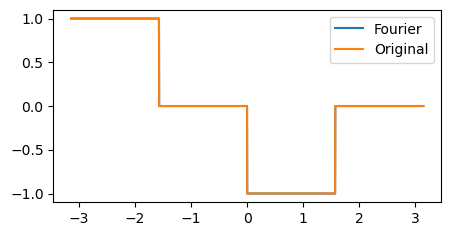

In [ ]:
# probando el plot final
fig, ax = plt.subplots(figsize=(5,2.5))
plt.plot(x, F.real, label='Fourier')
plt.plot(x, f, label='Original')
plt.legend()
plt.show()

# PlayGround

x: [-3.14159265 -3.13845106 -3.13530947 ...  3.13530947  3.13845106
  3.14159265]
using N: 2001
T: 6.283185307179592 = 2 pi
N/4: 500


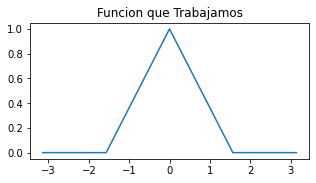

In [1]:
# definimos la funcion creando un domain
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dx = 0.001
L = np.pi # limite superior e inferior [-pi, pi]
x = L * np.arange(-1, 1+dx, dx)
print("x:",x)

N = len(x)
print("using N:",N)

# el periodo seria
T = x[-1] - x[0]
print("T:", T, "= 2 pi")
#del periodo viene omega que resume la informacion frecuencial


# definir la funcion / Ingresar datos
Nquart = int(np.floor(N/4))
print("N/4:", Nquart)

f = np.zeros_like(x) #crea un arreglo identico a x pero con zeros
# f[:Nquart] = 0 # el primer cuarto tiene 0's y el ultimo
f[Nquart:2*Nquart] = np.linspace(0,1,Nquart)
f[2*Nquart:3*Nquart] = np.linspace(1,0,Nquart)


# ------------ plot de la funcion usada
fig, ax = plt.subplots(figsize=(5,2.5))
plt.title('Funcion que Trabajamos')
plt.plot(x,f)
plt.show()

### calcula la DFT

In [2]:
#  resolviendo con regla trapezoidal
M = N
c = np.zeros(M, complex)

# omega = 2 * np.pi / T # se puede utilizar la representacion 
# x = nT/N

for k in range(0, M):
    for n in range(0, N):
        c[k] += f[n] * np.exp(-1j * 2*np.pi * k * n / N)

print("c[k]:",c)


c[k]: [ 500.        +0.j         -405.54363892-1.27342039j
  203.2465952 +1.2764146j  ...  -45.48393591+0.42847444j
  203.2465952 -1.2764146j  -405.54363892+1.27342039j]


### la Inverse DFT

c[k]: [ 500.        +0.j         -405.54363892-1.27342039j
  203.2465952 +1.2764146j  ...  -45.48393591+0.42847444j
  203.2465952 -1.2764146j  -405.54363892+1.27342039j]


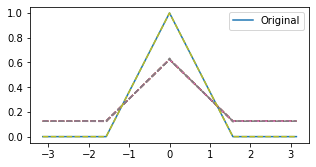

In [52]:


# se realiza el plot con los coeficinetes ---- 
F = np.zeros_like(x, complex)

fig, ax = plt.subplots(figsize=(5,2.5))
plt.plot(x, f, label='Original')


for k in range(0, M):
    for n in range(0, N): # suma interna de todos los puntos
        F[n] += c[k] * np.exp(1j * 2*np.pi * k * n / N) / N
    
    if ((k % 20  == 0) and k>1850):
        plt.plot(x, F.real, '--')

# F = F/N

plt.legend()
plt.show()

### animando la Inverse DFT

In [ ]:
# animando
F = np.zeros_like(x, complex)
# donde dejar las imagenes
!mkdir plots

counter = 0

for k in range(0, M):
    for n in range(0, N): # suma interna de todos los puntos
        F[n] += c[k] * np.exp(1j * 2     *np.pi * k * n / N) / N

        if (k % 20  == 0):
                fig, ax = plt.subplots(figsize=(16,8), clear=True)
                ax.plot(x, f, label='Original') 
                ax.plot(x, F.real, '--')
                plt.legend()
                plt.savefig(f'plots/{str(counter).zfill(4)}.png')
                counter += 1
                plt.ioff() # apaga modo interactivo para intentar arreglar el memory leak problem
                plt.close()



In [ ]:
# repeat for last frame a second:
fps = int(counter/5)
for i in range(fps):
    fig, ax = plt.subplots(figsize=(16,8), clear=True)
    ax.plot(x, f, label='Original') 
    ax.plot(x, F.real, '--')
    plt.legend()
    plt.savefig(f'plots/{str(counter).zfill(4)}.png')
    counter += 1
    plt.close()

In [ ]:
print('cantidad de frames:', counter)
# frame rate para 5 segundos

cantidad de frames: 384.8
frame rate f= 76.96000000000001


In [ ]:
# codigo para juntarlo en un archivo mp4
!ffmpeg -r 60 -i 'plots/%04d.png' -pix_fmt yuv420p -qscale 1 complex_fourier.mp4

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [ ]:
from google.colab import files
files.download('./complex_fourier.mp4')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# borra los archivos luego de descargarlos
!rm complex_fourier.mp4

rm: cannot remove 'complex_fourier.mp4': No such file or directory


In [6]:
# borra la carpeta de plots
!rm -r plots